 # Load library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Get data

source:-https://www.kaggle.com/datasets/elakiricoder/gender-classification-dataset

In [2]:
data = pd.read_csv('gender_classification_v7.csv')  #  load data

In [3]:
data.head()   # read the first 5 row

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [4]:
data.shape   # check shape

(5001, 8)

In [5]:
data.isnull().sum()   # check null values

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


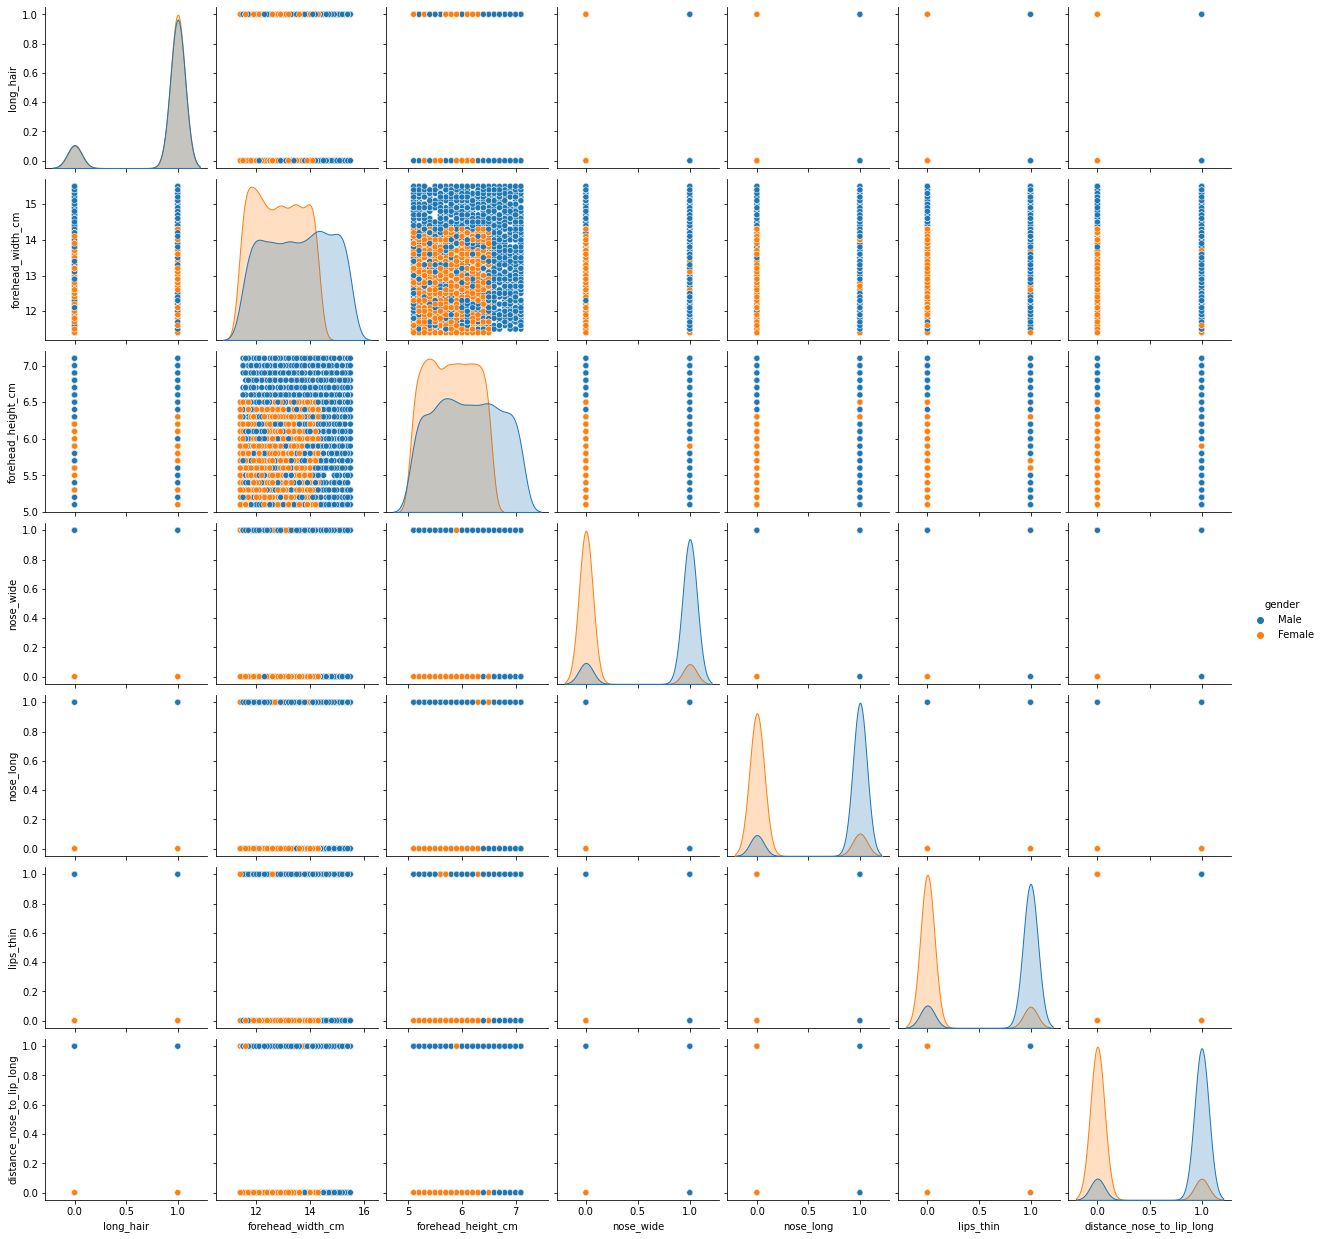

In [7]:
sns.pairplot(data = data,hue = 'gender')

## Convert categorical into numerical

In [8]:
data['gender'] = data['gender'].map({"Male": 0, "Female":1})

## checking corelation 

<AxesSubplot:>

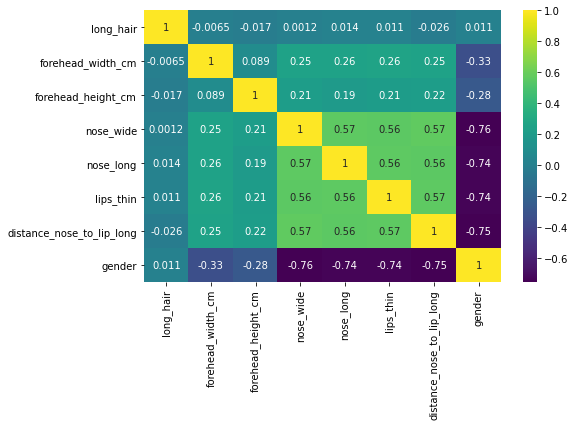

In [9]:
plt.figure(figsize=(8,5))
sns.heatmap(data.corr() , cmap = 'viridis' , annot = True)

In [10]:
data

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,0
1,0,14.0,5.4,0,0,1,0,1
2,0,11.8,6.3,1,1,1,1,0
3,0,14.4,6.1,0,1,1,1,0
4,1,13.5,5.9,0,0,0,0,1
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,1
4997,1,11.9,5.4,0,0,0,0,1
4998,1,12.9,5.7,0,0,0,0,1
4999,1,13.2,6.2,0,0,0,0,1


## Training and testing

In [11]:
X = data.drop(columns = ['gender'], axis = 1)
y = data['gender']

In [12]:
print(X.shape)
print(y.shape)

(5001, 7)
(5001,)


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# ML algorithm(Logistic Regression)

In [15]:
from sklearn.linear_model import LogisticRegression
Lr=LogisticRegression()

### Model fit on training data set

In [16]:
Lr.fit(X_train,y_train)

LogisticRegression()

### predict with test data

In [17]:
y_pred = Lr.predict(X_test)

## Import metrics

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score , confusion_matrix

## Check score

In [19]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9700199866755497
[[733  22]
 [ 23 723]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       755
           1       0.97      0.97      0.97       746

    accuracy                           0.97      1501
   macro avg       0.97      0.97      0.97      1501
weighted avg       0.97      0.97      0.97      1501



## Model has 97% score which is pretty good